In [ ]:
CT!pip install Kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
import os
os.environ['kaggle_congif_dir']='/content'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

 92% 111M/121M [00:02<00:00, 76.9MB/s]
100% 121M/121M [00:02<00:00, 56.6MB/s]


In [ ]:
#with open('/content/drive/MyDrive/minor/sample.txt', 'w') as f:
 # f.write('Hello, World!')

# MAIN CODE

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

#importing libraries
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential
from keras.optimizers import Adam,SGD,RMSprop

In [ ]:
!unzip \*.zip && rm *.zip

In [ ]:
picture_size = 48 #standardise size of each picture
folder_path = "/content/images/"

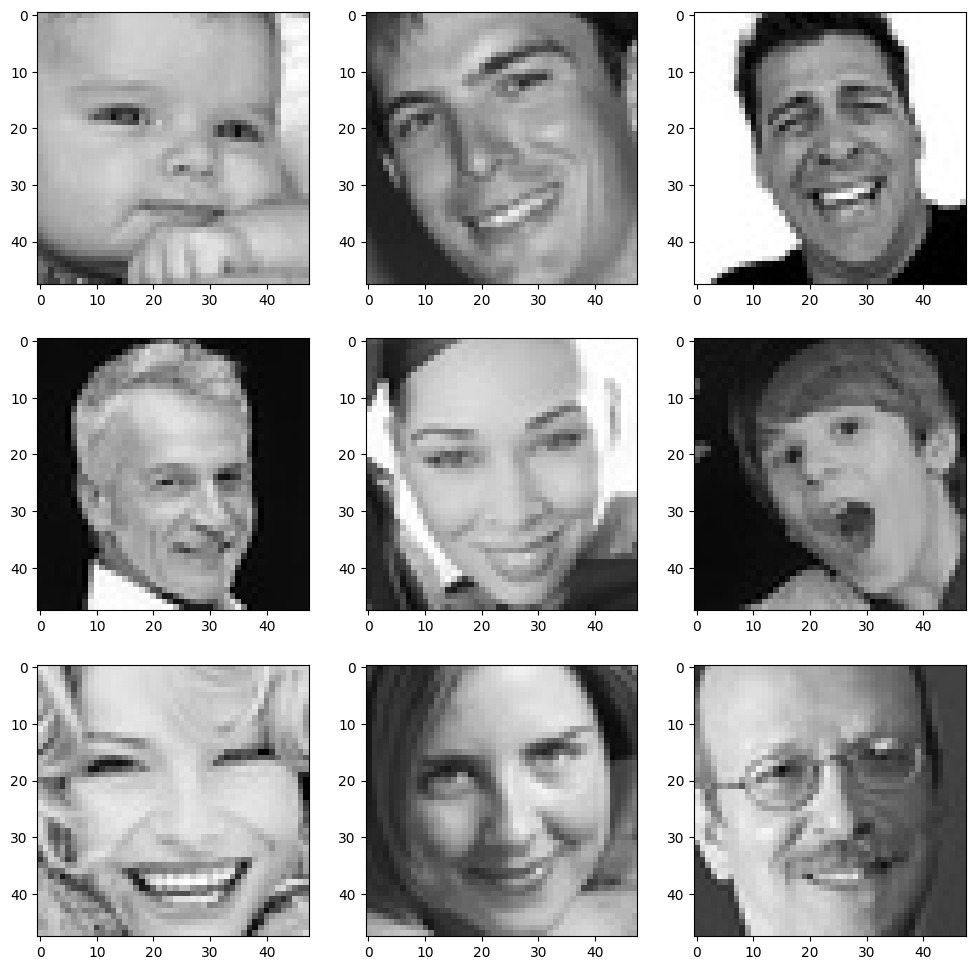

In [ ]:
expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+
                  os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [ ]:
batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(lr = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/MyDrive/minor/model.h5", monitor='accuracy', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          patience=7,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              patience=7,
                              verbose=1
                              )

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

In [ ]:
history = model.fit_generator(generator=train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )

Epoch 1/48


<ipython-input-42-981791b505f2>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_set,


225/225 [==============================] - ETA: 0s - loss: 0.6871 - accuracy: 0.7434
Epoch 1: accuracy improved from -inf to 0.74339, saving model to /content/drive/MyDrive/minor/model.h5
225/225 [==============================] - 21s 95ms/step - loss: 0.6871 - accuracy: 0.7434 - val_loss: 0.9834 - val_accuracy: 0.6489 - lr: 2.0000e-05
Epoch 2/48
225/225 [==============================] - ETA: 0s - loss: 0.6781 - accuracy: 0.7469
Epoch 2: accuracy improved from 0.74339 to 0.74694, saving model to /content/drive/MyDrive/minor/model.h5
225/225 [==============================] - 19s 86ms/step - loss: 0.6781 - accuracy: 0.7469 - val_loss: 0.9832 - val_accuracy: 0.6510 - lr: 2.0000e-05
Epoch 3/48
225/225 [==============================] - ETA: 0s - loss: 0.6719 - accuracy: 0.7489
Epoch 3: accuracy improved from 0.74694 to 0.74893, saving model to /content/drive/MyDrive/minor/model.h5
225/225 [==============================] - 19s 82ms/step - loss: 0.6719 - accuracy: 0.7489 - val_loss: 0.989

 Graph

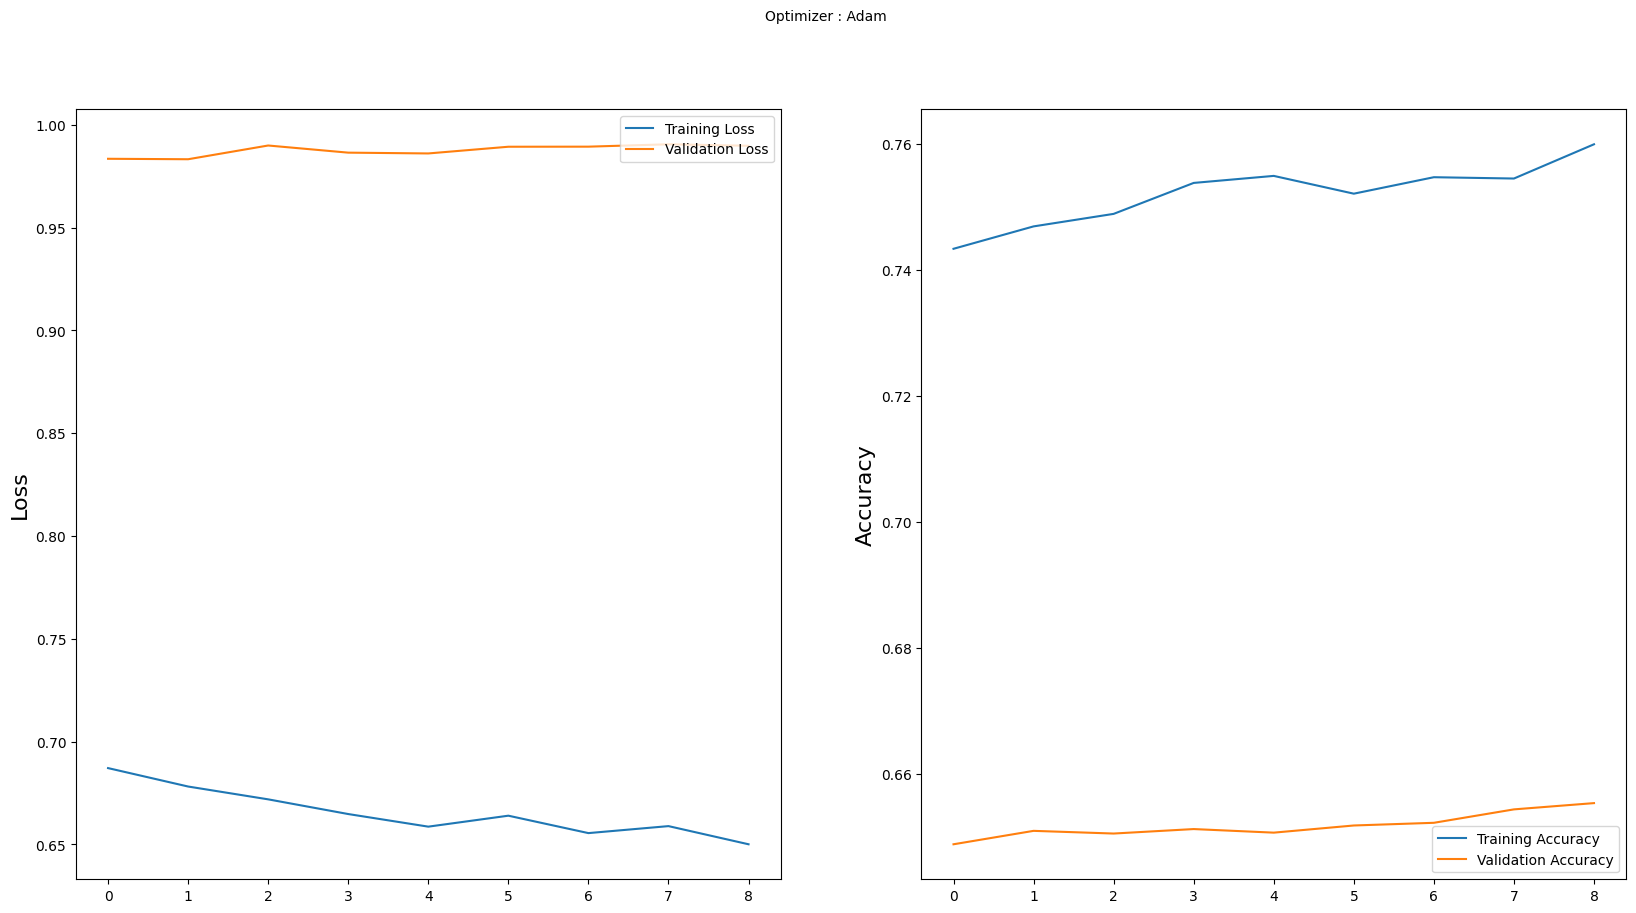

In [ ]:
#plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
best_model = "/content/drive/MyDrive/minor/model.h5"

# **EVALUATE THE ACCURACY AND LOSS**

In [ ]:
loss_tr,acc_tr =model.evaluate_generator(train_set)
print("Accuracy =", acc_tr)
print("categorical loss = ", loss_tr)

<ipython-input-53-64c3d488ea79>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_tr,acc_tr =model.evaluate_generator(train_set)


Accuracy = 0.8419555425643921
categorical loss =  0.47014227509498596


In [ ]:
loss_ts,acc_ts =model.evaluate_generator(test_set)
print("Accuracy =", acc_ts)
print("categorical loss = ", loss_ts)

<ipython-input-54-770cac1d6e52>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  loss_ts,acc_ts =model.evaluate_generator(test_set)


Accuracy = 0.6517124176025391
categorical loss =  0.982451319694519


# **CONFUSION MATRIX**

In [ ]:
import itertools

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
labels = (train_set.class_indices)
labels = dict((v, k) for k, v in labels.items())

x_test, y_test = train_set.__getitem__(0)

In [ ]:
test_true = np.argmax(y_test, axis=1)
test_pred = np.argmax(model.predict(x_test), axis=1)
print(test_pred)

4/4 [==============================] - 0s 9ms/step
[5 1 3 4 3 5 3 5 5 3 3 2 5 0 3 2 2 5 4 3 2 3 4 0 5 3 2 2 4 0 2 4 6 2 5 3 2
 3 4 5 0 4 1 6 6 6 4 5 3 5 0 2 0 4 0 5 3 3 4 5 5 0 4 0 2 3 3 0 4 5 0 3 4 6
 4 5 5 2 3 6 6 4 4 6 3 5 3 6 6 1 5 2 3 0 3 4 4 2 5 6 2 3 4 1 5 2 0 4 3 0 3
 3 6 3 5 5 5 4 4 3 0 2 0 3 6 6 6 3]


In [ ]:
print("CNN Model Accuracy on test set: {:.4f}".format(accuracy_score(test_true, test_pred)))

CNN Model Accuracy on test set: 0.8828


In [ ]:
preds = model.predict(x_test)
print(classification_report(test_true, test_pred))

4/4 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

           0       0.94      0.83      0.88        18
           1       1.00      1.00      1.00         4
           2       0.94      0.73      0.82        22
           3       0.93      1.00      0.97        28
           4       0.73      0.89      0.80        18
           5       0.83      0.87      0.85        23
           6       0.93      0.93      0.93        15

    accuracy                           0.88       128
   macro avg       0.90      0.89      0.89       128
weighted avg       0.89      0.88      0.88       128



In [ ]:
def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    fmt = '.2f'
    thresh = cm.max()/2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.tight_layout()

In [ ]:
cnf_matrix = confusion_matrix(test_true, test_pred)
np.set_printoptions(precision=45)

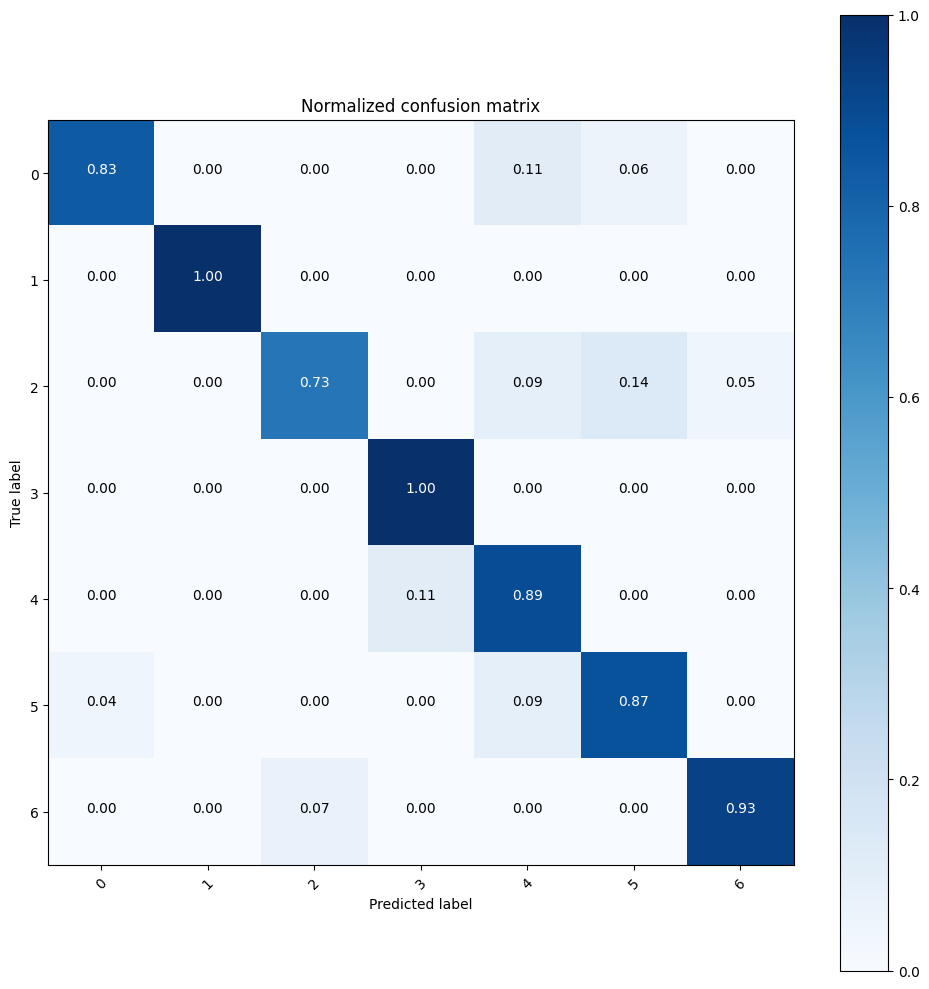

In [ ]:
plot_confusion_matrix(cnf_matrix, classes=labels, title='Normalized confusion matrix')
plt.show()

# **Useless code**

In [ ]:
classes = [x for x in range(9)]
confusion = confusion_matrix(test_true, test_pred)
print(confusion)

[[15  0  0  0  2  1  0]
 [ 0  4  0  0  0  0  0]
 [ 0  0 16  0  2  3  1]
 [ 0  0  0 28  0  0  0]
 [ 0  0  0  2 16  0  0]
 [ 1  0  0  0  2 20  0]
 [ 0  0  1  0  0  0 14]]


In [ ]:
list_diag = np.diag(confusion)
print(list_diag)

[15  4 16 28 16 20 14]


# **NEED TO TRY A NEW METHOD**

In [ ]:
from sklearn.metrics import confusion_matrix
results = model.predict(x_test)
cm = confusion_matrix(np.where(y_test == 1)[1], results)

4/4 [==============================] - 1s 6ms/step


ValueError: Classification metrics can't handle a mix of multiclass and continuous-multioutput targets

In [ ]:
import seaborn as sns
import pandas as pd

In [ ]:
label_mapdisgust = ['anger','disgust','fear','happy','neutral','sad','surprise']

In [ ]:
#Transform to df for easier plotting
cm_df = pd.DataFrame(cm, index = label_mapdisgust,
                     columns = label_mapdisgust
                    )

NameError: name 'cm' is not defined

In [ ]:
final_cm = cm_df

In [ ]:
final_cm

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(final_cm, annot = True,cmap='Greys',cbar=False,linewidth=2,fmt='d')
plt.title('CNN Emotion Classify')
plt.ylabel('True class')
plt.xlabel('Prediction class')
plt.show()